# 3. Machine Lerning for Classification 
logistic Regression


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('telco-customer-churn.csv')
df.columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.2 Data Preperation

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [5]:
categorical_variable = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_variable:
    df[c] = df[c].str.lower().str.replace(" ","_")
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)


df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [7]:
df.churn = (df.churn == "yes").astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.2 Train , Val, Test data Split with Scikit Learn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) #ဘာလို့လဲဆိုတော့ ၈၀ ရဲ့ ၂၅ ရာခိုင်နှုန်းကိုနှုတ်မှ ၆၀% Train Data ကိုရမယ် 
len(df_train), len(df_val), len(df_test)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [10]:
df_full_train = df_full_train.reset_index(drop=True)

In [11]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [13]:
df_full_train.churn.mean()

0.26996805111821087

# Categorical နဲ့ Numerical Variable ခွဲ ထုတ်တယ် ဘာလို့လဲဆိုတော့ 

In [14]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [15]:

categorical = [
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

df_full_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance : Churn rate and risk ration

* ဘာကြောင့် လုပ်ရလဲ ဆိုတော့ ဘယ် Feature Variable က ကိုယ့်ရဲ့ Target Variable(churn) ကို အပြောင်းအလဲဖြစ်စေလဲဆိုတာကို သိရအောင်

In [16]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [17]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [18]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [19]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [20]:
global_churn - churn_female

-0.006855983216553063

In [21]:
global_churn - churn_male

0.006754520462819769

In [22]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [23]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [24]:
global_churn - churn_partner

0.06493474245795922

In [25]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [26]:
global_churn - churn_no_partner

-0.05984095297455855

# Risk Ratio

ဘာကြောင့်လုပ်လဲဆိုတော့ ကိုယ့်ရဲ့ Target Variable အပေါ် တခြား Variable တွေရဲ့ သက်ရောက်မှု ဆက်ဆပ်မှုကို သိချင်လို့

ကိုသိချင်လို့

In [27]:
from IPython.display import display

for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importance: Mutual information

Mutual information ဆိုတာ ဘာလဲဆိုတော့ တန်ဖိုးတခုကို သိရင် နောက်ထပ်ဘာတွေသိနိုင်မလဲဆိုတာကိုပြောချင်တာ 
Mutual Information Theory 

ဥပမာ 
- က နဲ့ င နဲ့ မသိဘူး 
- ဒါပေမယ့် က နဲ့ ဂနဲ့ သိတယ် 
- ခ နဲ့ င နဲ့ သိကြတယ် 
- ဂ နဲ့ ခ နဲ့ သိကြတယ်
ဆိုတာမျိူးကို Mutual ဖြစ်တယ်လို့ခေါ်တယ် မြင်သာအောင်ပြောရရင် ဖွဘုတ်ရဲ့ Mutual Friend ဟာ Mutual information ကိုအခြေခံထားတယ်လို့ပြောလို့ရမလားပဲ

ဘယ်လောက် Mutual ဖြစ်မဖြစ်ကို mutual_info_score နဲ့ တိုင်းကြတယ်


In [28]:
from sklearn.metrics import mutual_info_score


mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [29]:
mutual_info_score(df_full_train.gender, df_full_train.churn) # gender နဲ့ Churn mutualဖြစ်နှုန်း ရှာ

0.0001174846211139946

In [30]:
mutual_info_score(df_full_train.partner, df_full_train.churn) # partner နဲ့ Churn mutualဖြစ်နှုန်း ရှာ

0.009967689095399745

In [31]:
# ရှိသမျှ Categorical Variableတွေအကုန်လုံးနဲ့ TargetVariable Churn Mutual ဘယ်လောက်ဖြစ်လဲဆိုတာရှာ

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [32]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)



contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

* အပေါ် ကရလဒ်ကိုကြည့်ရင် Contract က Churn Rate နဲ့ Mutual အဖြစ်ဆုံးဖြစ်ပြီး Gender က Mutual မဖြစ်ဆုံးလို့ပြောလို့ရ

# 3.7 Feature Importance: Correlation
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Numerical columns တွေနဲ့ ရော ဆက်ဆိုင်မှုဘယ်လောက်ရှိမလဲ ဆိုတာကြည့်


In [33]:
df_full_train.tenure.max()

72

In [35]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [ ]:
# ဒါကဘာလုပ်တာလဲ ဆိုတော့ Tenure နဲ့ ChurnRateဘယ်ဘလောက်ဆက်ဆပ်မှုရှိလဲဆိုတာရှာတာ

In [37]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [41]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [42]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17634908339788277

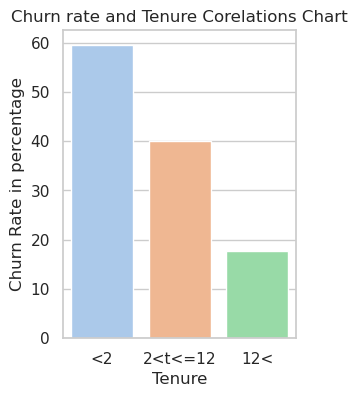

In [63]:

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
data_categories = ['<2','2<t<=12','12<']
data = [df_full_train[df_full_train.tenure <=2].churn.mean()*100, df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()*100, df_full_train[(df_full_train.tenure > 12)].churn.mean()*100]

# Create a histogram using Seaborn
# sns.set(style="whitegrid")
plt.figure(figsize=(3, 4))
sns.barplot(x=data_categories, y=data,palette="pastel")  # Adjust bins and color as needed

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Churn Rate in percentage')
plt.title('Churn rate and Tenure Corelations Chart')

plt.show()

# အခု ရလဒ် အရဆိုရင် Churn Rate က တနှစ် အထက်ဖြစ်လာပြီဆိုရင်တော့နည်းသွားတယ် ဆိုတာတွေ့ရတယ်

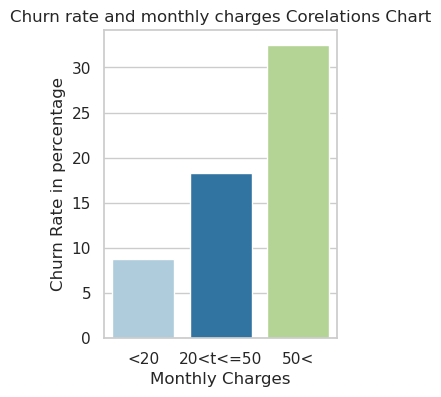

In [73]:
data_categories = ['<20','20<t<=50','50<']
data = [df_full_train[df_full_train.monthlycharges <=20 ].churn.mean()*100, df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <=50)].churn.mean()*100, df_full_train[(df_full_train.monthlycharges > 50)].churn.mean()*100]

# Create a histogram using Seaborn
# sns.set(style="whitegrid")
plt.figure(figsize=(3, 4))
sns.barplot(x=data_categories, y=data,palette="Paired")  # Adjust bins and color as needed

# Add labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate in percentage')
plt.title('Churn rate and monthly charges Corelations Chart')

plt.show()

# အခု ရလဒ် အရဆိုရင် Churn Rate က လစဥ် ပိုက်ဆံနဲ့ ဆက်ဆပ်မှုပိုရှိတယ်ဆိုတာတွေ့ရတယ်

# 3.8 One-Hot Encoding
- Once Hot Encoding လုပ်တယ်ဆိုတော Categories တွေကို နံပါတ်ဖြစ်အောင်ပြောင်းတာပဲ လွယ်လွယ်ကူကူမှတ်လို့လွယ် တွက်ချက်လွယ်အောင်
- ဥပမာ အရောင်တွေ red,green,blue ဆိုရင် Category ၃ ခုရှိတယ် ရှိတဲ့ Categories တွေကို လွယ်လွယ်ကူကူတွက်လို့လွယ်အောင် red=1,green=2,blue=3 လို့သတ်မှတ်တာကို One-Hot Encoding လို့ခေါ်တယ် ?

In [74]:
from sklearn.feature_extraction import DictVectorizer

In [83]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical+numerical].to_dict(orient='records')
df_train[categorical+numerical].head()
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

# 3.9 Logistic Regression